In [2]:
import os
import sys
directory_path = os.path.abspath(os.path.join('..'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import numpy as np
from data import Dataset

DATA_DIR = "../data/Problem_01"
RESULT_DIR = "../results/Problem_01"

dataset = Dataset(DATA_DIR, RESULT_DIR, fps=5)

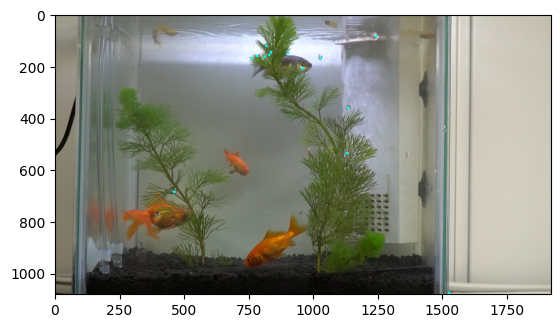

In [3]:
import cv2
import matplotlib.pyplot as plt

imgs = dataset.get_images([0, 1, 2])

# ax1 = plt.subplot(1,2,1)
# ax2 = plt.subplot(1, 2, 2)
# ax1.imshow(imgs[0])
# ax2.imshow(imgs[1])

# グレースケールにしてコーナ特徴点を抽出
prev_frame = imgs[0]
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_RGB2GRAY)

feature_params = {
    "maxCorners": 500,  # 特徴点の上限数
    "qualityLevel": 0.5,  # 閾値　（高いほど特徴点数は減る)
    "minDistance": 12,  # 特徴点間の距離 (近すぎる点は除外)
    "blockSize": 21  # 
}
p0 = cv2.goodFeaturesToTrack(prev_gray, mask=None, **feature_params)
# 特徴点をプロットして可視化
for p in p0:
    x,y = p.ravel()
    cv2.circle(prev_frame, (np.floor(x).astype(np.int32), np.floor(y).astype(np.int32)), 5, (0, 255, 255) , -1)
    
plt.imshow(prev_frame)
